# Data Preprocessing  

In [440]:
import numpy as np
import pandas as pd

In [441]:
data = pd.read_csv(R'D:\Concordia\Systems Analytics\Assignment 1\Data_affected area_modified.csv')

In [442]:
data.info()
    #After projecting the data info, it is clear that there are less null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       515 non-null    float64
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   A       515 non-null    float64
 5   B       517 non-null    float64
 6   C       517 non-null    float64
 7   D       517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      516 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 52.6+ KB


In [443]:
data.nunique()

X         11
Y          7
month     13
day        7
A        109
B        215
C        219
D        119
temp     192
RH        76
wind      21
rain       7
area     251
dtype: int64

In [444]:
data.isnull().sum() 

X        0
Y        2
month    0
day      0
A        2
B        0
C        0
D        0
temp     0
RH       1
wind     0
rain     0
area     0
dtype: int64

Here, there are only 5 rows of null values, so lets drop those rows.

In [445]:
data= data.dropna()

In [446]:
data.isnull().sum() 

X        0
Y        0
month    0
day      0
A        0
B        0
C        0
D        0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [447]:
data.describe()

,X,Y,A,B,C,D,temp,RH,wind,rain,area
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,4.953125,4.296875,90.627344,111.008984,547.890820,9.004687,18.861133,44.667969,4.021094,0.021875,12.972754
std,5.280929,1.231418,10.512650,64.186238,248.191938,4.521674,5.800759,17.747498,1.797101,0.297396,63.953740
min,1.000000,2.000000,0.000000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,67.025000,436.600000,6.475000,15.500000,32.750000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.580000
75%,7.000000,5.000000,92.900000,142.400000,714.000000,10.725000,22.800000,54.000000,5.025000,0.000000,6.587500
max,90.000000,9.000000,250.000000,291.300000,860.600000,56.100000,33.300000,200.000000,9.400000,6.400000,1090.840000


### Based on the above discription, the column X, A and RH has values out of the context. 

In [448]:
#Applying the range restriction to the columns X, A and RH. 
df = data[(data['X'] <= 9) &  (data['A'] >= 18.7) & (data['A'] <= 96.20) & (data['RH'] <= 100)]
df.describe()

,X,Y,A,B,C,D,temp,RH,wind,rain,area
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,4.658103,4.290514,90.659091,111.148024,547.068379,8.992095,18.866008,44.428854,4.018182,0.022134,13.084605
std,2.327558,1.236647,5.481274,64.434763,248.126794,4.534145,5.828631,16.376870,1.799930,0.299148,64.319630
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,63.875000,434.400000,6.425000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,661.800000,8.400000,19.300000,42.000000,4.000000,0.000000,0.645000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.700000,22.800000,53.750000,4.900000,0.000000,6.602500
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [449]:
    df = df.drop_duplicates()

In [450]:
df.shape

(503, 13)

df is the new dataset after removing outliers.

In [451]:
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
}

# Apply the mapping to create a updated numerical values for the categorical data.
df['day'] = df['day'].map(day_mapping)
df['month'] = df['month'].map(month_mapping)

# Display the updated DataFrame
print(df)


     X    Y  month  day     A      B      C     D  temp    RH  wind  rain  \
0    7  5.0      3    5  86.2   26.2   94.3   5.1   8.2  51.0   6.7   0.0   
1    7  4.0     10    2  90.6   35.4  669.1   6.7  18.0  33.0   0.9   0.0   
2    7  4.0     10    6  90.6   43.7  686.9   6.7  14.6  33.0   1.3   0.0   
3    8  6.0      3    5  91.7   33.3   77.5   9.0   8.3  97.0   4.0   0.2   
4    8  6.0      3    7  89.3   51.3  102.2   9.6  11.4  99.0   1.8   0.0   
..  ..  ...    ...  ...   ...    ...    ...   ...   ...   ...   ...   ...   
512  4  3.0      8    7  81.6   56.7  665.6   1.9  27.8  32.0   2.7   0.0   
513  2  4.0      8    7  81.6   56.7  665.6   1.9  21.9  71.0   5.8   0.0   
514  7  4.0      8    7  81.6   56.7  665.6   1.9  21.2  70.0   6.7   0.0   
515  1  4.0      8    6  94.4  146.0  614.7  11.3  25.6  42.0   4.0   0.0   
516  6  3.0     11    2  79.5    3.0  106.7   1.1  11.8  31.0   4.5   0.0   

      area  
0     0.00  
1     0.00  
2     0.00  
3     0.00  
4     0.00

In [452]:
df

,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
0,7,5.0,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4.0,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4.0,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6.0,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6.0,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3.0,8,7,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4.0,8,7,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4.0,8,7,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4.0,8,6,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


# "Reason for choosing mapping dictionary approach, because the labelencoder method assigns arbitrary numerical values and for not using onehot encoding is, it will increase the column size(12 months=12 columns)"

In [453]:
y = df.iloc[:, -1].values # Target variable 
X = df.iloc[:, :-1].values # Features' variable 
print(y)
print(X)
print(np.shape(y))

[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e

In [454]:
X

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

# Exploratory Data Analysis

Before moving on to data splitting, lets study how data looks like.

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns

In [457]:
df.corr()

,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
X,1.000000,0.543400,-0.072989,-0.030025,-0.023731,-0.048786,-0.093941,0.001478,-0.051750,0.080504,0.021141,0.065884,0.063906
Y,0.543400,1.000000,-0.061750,-0.011110,-0.036776,0.013232,-0.096819,-0.022578,-0.021459,0.065377,-0.018598,0.034173,0.046968
month,-0.072989,-0.061750,1.000000,-0.039733,0.281366,0.461347,0.865291,0.175347,0.369074,-0.104996,-0.086116,0.013431,0.058148
day,-0.030025,-0.011110,-0.039733,1.000000,-0.035824,0.070719,0.013167,0.034182,0.056467,0.091770,0.025978,-0.048664,0.023359
A,-0.023731,-0.036776,0.281366,-0.035824,1.000000,0.380310,0.325678,0.529753,0.432657,-0.305869,-0.038075,0.057595,0.040150
B,-0.048786,0.013232,0.461347,0.070719,0.380310,1.000000,0.682462,0.305633,0.468422,0.071953,-0.108553,0.074817,0.073234
C,-0.093941,-0.096819,0.865291,0.013167,0.325678,0.682462,1.000000,0.219927,0.499795,-0.046267,-0.204679,0.036259,0.051064
D,0.001478,-0.022578,0.175347,0.034182,0.529753,0.305633,0.219927,1.000000,0.394751,-0.127630,0.100742,0.069249,0.009474
temp,-0.051750,-0.021459,0.369074,0.056467,0.432657,0.468422,0.499795,0.394751,1.000000,-0.531285,-0.232777,0.070272,0.099587
RH,0.080504,0.065377,-0.104996,0.091770,-0.305869,0.071953,-0.046267,-0.127630,-0.531285,1.000000,0.077322,0.099712,-0.077419


Significant correlation are, 
month-C  = 0.86,
B - C    = 0.68,
B - Temp = 0.46,
C- Temp  = 0.49.
And four index having positive correlation with temp data.

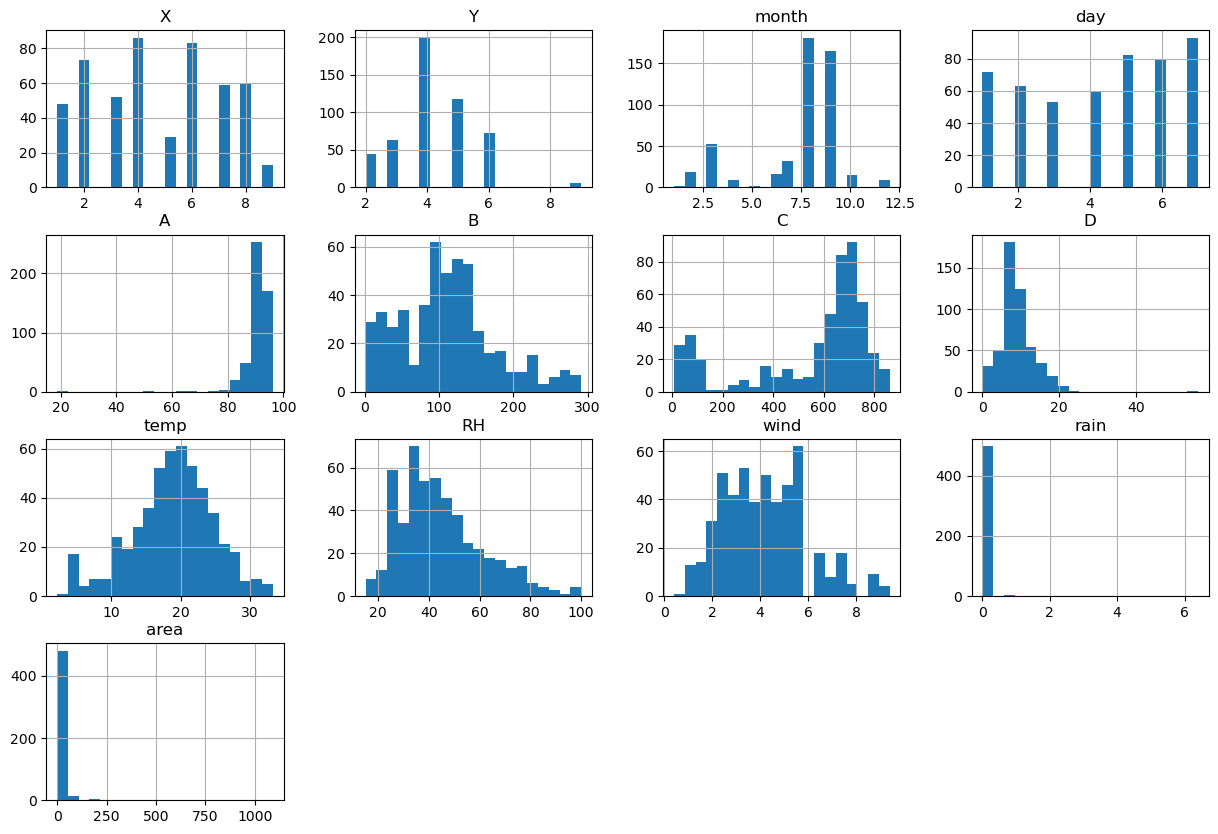

In [458]:
# Plot histograms for each numeric feature
df.hist(bins=20, figsize=(15, 10))
plt.show()

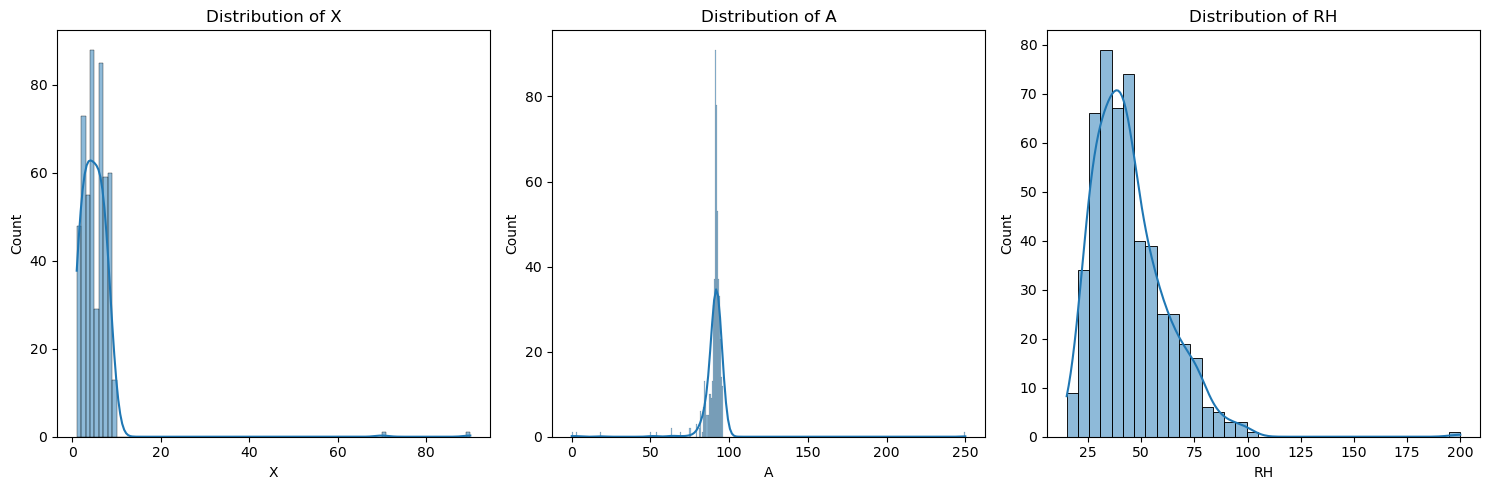

In [459]:
# Columns which had outliers before
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for 'X', 'A', and 'RH'
sns.histplot(data['X'].dropna(), ax=axes[0], kde=True)
sns.histplot(data['A'].dropna(), ax=axes[1], kde=True)
sns.histplot(data['RH'].dropna(), ax=axes[2], kde=True)


axes[0].set_title('Distribution of X')
axes[1].set_title('Distribution of A')
axes[2].set_title('Distribution of RH')


plt.tight_layout()
plt.show()

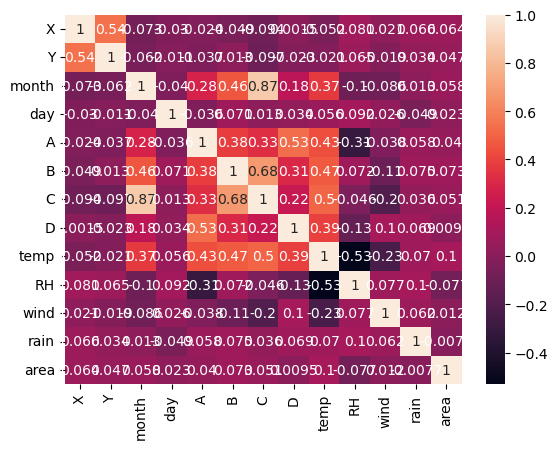

<Figure size 1200x800 with 0 Axes>

In [460]:
sns.heatmap(df.corr(),annot = True)
plt.figure(figsize=(12, 8))
plt.show()

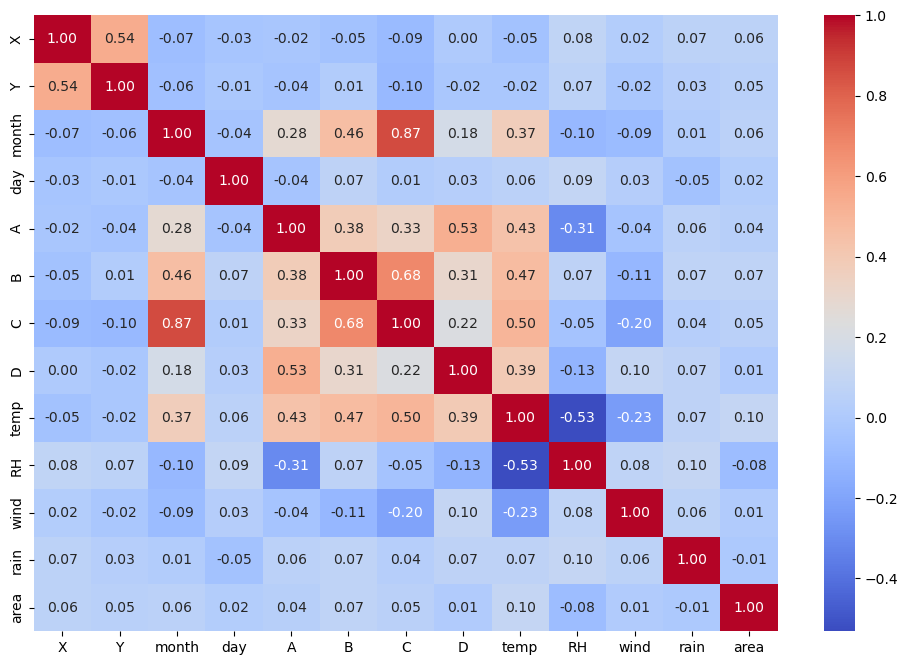

In [461]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

<Axes: >

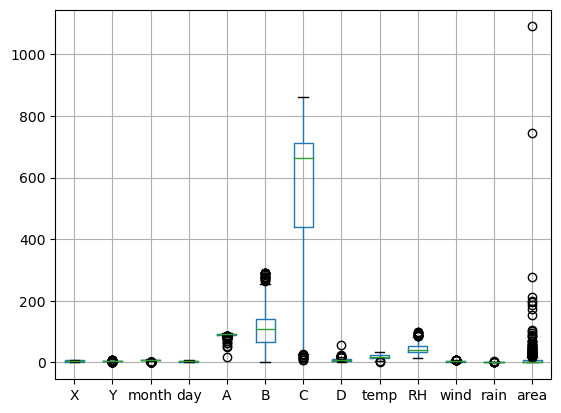

In [462]:
df.boxplot()

In [463]:
df.dtypes

X          int64
Y        float64
month      int64
day        int64
A        float64
B        float64
C        float64
D        float64
temp     float64
RH       float64
wind     float64
rain     float64
area     float64
dtype: object

In [464]:
df.shape

(503, 13)

# Regression Models:

### 1. Linear Regression 

In [535]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [536]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [537]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.31e+01  0.00e+00]
 [ 1.94e+01  0.00e+00]
 [ 1.06e+00  4.67e+01]
 [ 1.60e+01  2.03e+00]
 [ 1.95e+01  7.80e+00]
 [ 9.06e+00  0.00e+00]
 [ 1.93e+01  6.58e+00]
 [ 2.13e+01  3.20e+00]
 [ 6.98e+00  2.53e+00]
 [ 1.67e+01  1.90e+00]
 [ 6.82e-01  0.00e+00]
 [ 1.01e+01  6.54e+00]
 [ 7.89e+00  7.90e-01]
 [ 2.12e+01  8.85e+01]
 [ 2.07e+01  5.33e+00]
 [ 2.29e+01  0.00e+00]
 [ 2.04e+01  2.64e+01]
 [ 1.93e+01  1.37e+01]
 [ 1.46e+01  1.94e+00]
 [ 1.31e+01  0.00e+00]
 [ 7.04e+00  3.19e+01]
 [ 2.23e+01  0.00e+00]
 [ 1.86e+01  1.01e+01]
 [ 7.45e+00  0.00e+00]
 [ 1.81e+00  0.00e+00]
 [ 2.09e+01  7.46e+02]
 [ 1.42e+01  0.00e+00]
 [ 1.94e+01  2.87e+01]
 [ 4.20e-01  0.00e+00]
 [ 6.31e+00  7.50e-01]
 [ 1.42e+01  6.04e+00]
 [ 1.94e+01  0.00e+00]
 [-2.69e-02  0.00e+00]
 [ 1.14e+01  5.43e+01]
 [ 1.20e+01  2.95e+01]
 [ 9.99e+00  3.94e+01]
 [ 1.55e+01  0.00e+00]
 [-3.55e+00  6.84e+00]
 [ 2.23e+01  9.77e+00]
 [ 1.08e+01  1.15e+01]
 [ 2.08e+01  1.56e+01]
 [ 1.74e+01  0.00e+00]
 [ 2.00e+01  3.05e+00]
 [ 1.79e+01

In [468]:
# R Square test to check the model performance.
from sklearn.metrics import mean_squared_error,r2_score
r2_score(y_test, y_pred)

0.01911332535125132

In [469]:
mean_squared_error(y_test, y_pred)

4476.838614631329

### 2. Polynomial  Regression 

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [471]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [472]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.83e+02  0.00e+00]
 [ 5.78e+02  0.00e+00]
 [ 4.78e+01  4.67e+01]
 [-1.41e+01  2.03e+00]
 [ 3.23e+02  7.80e+00]
 [-5.69e+01  0.00e+00]
 [-1.28e+02  6.58e+00]
 [-3.90e+02  3.20e+00]
 [ 3.77e+02  2.53e+00]
 [-4.63e+01  1.90e+00]
 [-1.20e+02  0.00e+00]
 [ 1.81e+02  6.54e+00]
 [ 1.72e+02  7.90e-01]
 [ 2.93e+02  8.85e+01]
 [ 7.01e+02  5.33e+00]
 [ 8.67e+01  0.00e+00]
 [ 2.02e+01  2.64e+01]
 [-9.94e+02  1.37e+01]
 [ 4.82e+02  1.94e+00]
 [ 1.09e+02  0.00e+00]
 [ 1.58e+02  3.19e+01]
 [ 4.28e+02  0.00e+00]
 [-8.93e+02  1.01e+01]
 [ 1.96e+02  0.00e+00]
 [ 1.30e+02  0.00e+00]
 [ 8.50e+01  7.46e+02]
 [ 8.31e+01  0.00e+00]
 [ 1.59e+01  2.87e+01]
 [-1.94e+02  0.00e+00]
 [-1.52e+03  7.50e-01]
 [-3.67e+02  6.04e+00]
 [ 6.41e+02  0.00e+00]
 [ 6.62e+02  0.00e+00]
 [ 1.11e+03  5.43e+01]
 [ 3.56e+02  2.95e+01]
 [-9.33e+00  3.94e+01]
 [-2.76e+02  0.00e+00]
 [ 7.21e+02  6.84e+00]
 [ 1.99e+01  9.77e+00]
 [-1.46e+02  1.15e+01]
 [ 5.14e+02  1.56e+01]
 [ 7.39e+01  0.00e+00]
 [-3.96e+02  3.05e+00]
 [ 4.02e+01

In [473]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

-79.60602084812112

In [474]:
mean_squared_error(y_test, y_pred)

367891.78202861105

### 3. Decision Tree Regression 

In [475]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [476]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [477]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4.42e+00 0.00e+00]
 [4.96e+01 0.00e+00]
 [0.00e+00 4.67e+01]
 [0.00e+00 2.03e+00]
 [8.28e+01 7.80e+00]
 [1.31e+01 0.00e+00]
 [3.33e+00 6.58e+00]
 [3.63e+00 3.20e+00]
 [2.48e+01 2.53e+00]
 [2.55e+00 1.90e+00]
 [5.55e+00 0.00e+00]
 [0.00e+00 6.54e+00]
 [0.00e+00 7.90e-01]
 [9.41e+00 8.85e+01]
 [2.57e+00 5.33e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 2.64e+01]
 [1.72e+01 1.37e+01]
 [3.44e+01 1.94e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 3.19e+01]
 [0.00e+00 0.00e+00]
 [4.08e+00 1.01e+01]
 [0.00e+00 0.00e+00]
 [3.69e+01 0.00e+00]
 [0.00e+00 7.46e+02]
 [0.00e+00 0.00e+00]
 [0.00e+00 2.87e+01]
 [1.46e+00 0.00e+00]
 [3.19e+00 7.50e-01]
 [0.00e+00 6.04e+00]
 [0.00e+00 0.00e+00]
 [5.18e+01 0.00e+00]
 [1.12e+01 5.43e+01]
 [3.07e+00 2.95e+01]
 [1.26e+01 3.94e+01]
 [1.61e+00 0.00e+00]
 [2.13e+02 6.84e+00]
 [1.99e+01 9.77e+00]
 [1.72e+01 1.15e+01]
 [8.12e+00 1.56e+01]
 [1.11e+01 0.00e+00]
 [6.43e+00 3.05e+00]
 [7.19e+00 1.96e+02]
 [2.13e+02 0.00e+00]
 [0.00e+00 0.00e+00]
 [3.44e+01 6.11e+01]
 [1.56e+00 2.

In [478]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

-0.2784954346220341

In [479]:
mean_squared_error(y_test, y_pred)

5835.146789403973

### 4. Random Forest Regression

In [480]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [481]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [482]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.50e+00 0.00e+00]
 [9.30e+01 0.00e+00]
 [4.93e+00 4.67e+01]
 [5.94e+00 2.03e+00]
 [1.47e+01 7.80e+00]
 [4.85e+00 0.00e+00]
 [1.78e+01 6.58e+00]
 [4.90e+01 3.20e+00]
 [7.83e+00 2.53e+00]
 [4.62e+00 1.90e+00]
 [8.52e+00 0.00e+00]
 [2.00e+00 6.54e+00]
 [5.40e+00 7.90e-01]
 [1.73e+01 8.85e+01]
 [2.07e+01 5.33e+00]
 [1.64e+02 0.00e+00]
 [5.28e+01 2.64e+01]
 [5.94e+00 1.37e+01]
 [1.40e+01 1.94e+00]
 [4.52e+00 0.00e+00]
 [3.91e+00 3.19e+01]
 [3.67e+01 0.00e+00]
 [1.01e+01 1.01e+01]
 [2.44e+00 0.00e+00]
 [1.76e+01 0.00e+00]
 [2.68e+01 7.46e+02]
 [5.05e+00 0.00e+00]
 [3.30e+00 2.87e+01]
 [3.82e+00 0.00e+00]
 [6.31e+00 7.50e-01]
 [4.46e+00 6.04e+00]
 [5.35e+01 0.00e+00]
 [1.15e+01 0.00e+00]
 [5.15e+01 5.43e+01]
 [4.83e+00 2.95e+01]
 [1.24e+01 3.94e+01]
 [1.81e+01 0.00e+00]
 [3.61e+01 6.84e+00]
 [1.98e+01 9.77e+00]
 [1.99e+01 1.15e+01]
 [1.12e+01 1.56e+01]
 [1.18e+01 0.00e+00]
 [4.91e+01 3.05e+00]
 [2.48e+00 1.96e+02]
 [4.12e+01 0.00e+00]
 [3.23e+00 0.00e+00]
 [1.21e+01 6.11e+01]
 [6.89e+00 2.

In [483]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

-0.11236104506702271

In [484]:
mean_squared_error(y_test, y_pred)

5076.897269249757

### 5. K Neighbors Regression

In [485]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [486]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [487]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[8.20e-02 0.00e+00]
 [2.49e+02 0.00e+00]
 [3.40e-02 4.67e+01]
 [4.46e+00 2.03e+00]
 [1.69e+01 7.80e+00]
 [2.96e+00 0.00e+00]
 [9.18e-01 6.58e+00]
 [2.72e+01 3.20e+00]
 [3.64e+00 2.53e+00]
 [5.01e+00 1.90e+00]
 [1.75e+00 0.00e+00]
 [8.68e-01 6.54e+00]
 [2.92e+00 7.90e-01]
 [1.04e+01 8.85e+01]
 [2.51e+02 5.33e+00]
 [1.19e+01 0.00e+00]
 [4.41e+00 2.64e+01]
 [1.09e+00 1.37e+01]
 [1.63e+01 1.94e+00]
 [2.54e+00 0.00e+00]
 [6.08e+00 3.19e+01]
 [3.59e+01 0.00e+00]
 [1.52e+00 1.01e+01]
 [0.00e+00 0.00e+00]
 [1.59e+01 0.00e+00]
 [1.17e+00 7.46e+02]
 [3.40e-02 0.00e+00]
 [9.92e-01 2.87e+01]
 [8.54e-01 0.00e+00]
 [1.45e+01 7.50e-01]
 [1.97e+00 6.04e+00]
 [1.12e+01 0.00e+00]
 [1.59e+01 0.00e+00]
 [2.23e+00 5.43e+01]
 [2.25e+00 2.95e+01]
 [1.04e+01 3.94e+01]
 [9.18e-01 0.00e+00]
 [5.28e+00 6.84e+00]
 [1.51e+01 9.77e+00]
 [4.66e+01 1.15e+01]
 [9.58e+00 1.56e+01]
 [8.56e+00 0.00e+00]
 [2.72e+01 3.05e+00]
 [9.48e-01 1.96e+02]
 [1.84e+00 0.00e+00]
 [1.09e+00 0.00e+00]
 [2.20e-01 6.11e+01]
 [5.92e+00 2.

In [488]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

-0.2259960563342458

In [489]:
mean_squared_error(y_test, y_pred)

5595.535782304634

# Classification Models:

Before moving on to the classification, lets convert the y values from continus to discrete.

In [512]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [513]:
def preprocess_inputs(df, task='regression'):
    df = df.copy()
    
    # Ordinal encode month and day columns
    df = ordinal_encode(
        df,
        column='month',
        ordering=[
            'jan',
            'feb',
            'mar',
            'apr',
            'may',
            'jun',
            'jul',
            'aug',
            'sep',
            'oct',
            'nov',
            'dec'
        ]
    )
    df = ordinal_encode(
        df,
        column='day',
        ordering=[
            'sun',
            'mon',
            'tue',
            'wed',
            'thu',
            'fri',
            'sat'
        ]
    )
    
    # Split df into X and y
    if task == 'regression':
        y = df['area']
    elif task == 'classification':
        y = df['area'].apply(lambda x: 1 if x > 0 else 0)
    
    X = df.drop('area', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=1)
    
    # Scale feature data (X)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

### 1. Logistic Regression 

In [514]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')

In [515]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [516]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[46 49]
 [36 74]]
Accuracy: 58.54%


### 2. Decision Tree Classification

In [517]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')

In [518]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [519]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[54 41]
 [46 64]]
Accuracy: 57.56%


### 3. K Nearest Neighbors

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')

In [521]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [522]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[49 46]
 [44 66]]
Accuracy: 56.10%


### 4. Random Forest Classification 

In [523]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')

In [524]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [525]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[60 35]
 [42 68]]
Accuracy: 62.44%


### 5. Support Vector Machine 

In [526]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')

In [527]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [528]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[21 74]
 [16 94]]
Accuracy: 56.10%


### 6. Naive Bayes

In [532]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')

In [533]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [534]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[44 51]
 [38 72]]
Accuracy: 56.59%
